In [1]:
import pandas as pd
from geopy.geocoders import Nominatim

#print gn.geocode("Cleveland, OH 44106")

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
import json

In [5]:
#data = pd.read_csv("aiddata-countries-only-pivoted.csv",encoding = "ISO-8859-1")
data = pd.read_csv("aiddata-countries-only-2.csv",encoding = "ISO-8859-1")
coords = pd.read_csv("country_centroids.csv")

In [6]:
data["Donor"].unique()

array(['Switzerland', 'Japan', 'United States', 'Sweden', 'Canada',
       'France', 'Netherlands', 'Denmark', 'Norway', 'Italy', 'Germany',
       'Australia', 'Belgium', 'United Kingdom', 'Finland', 'Austria',
       'New Zealand', 'Kuwait', 'United Arab Emirates', 'Saudi Arabia',
       'Liechtenstein', 'Spain', 'Taiwan', 'Czech Republic', 'Portugal',
       'Ireland', 'Estonia', 'Luxembourg', 'Chile', 'Greece', 'Cyprus',
       'Hungary', 'Slovak Republic', 'Korea', 'Monaco', 'Brazil',
       'Colombia', 'Qatar', 'Thailand'], dtype=object)

In [7]:
coords = coords[["Longitude", "Latitude", "name", "name_long"]]

In [8]:
data["Amount"] = data["Amount"].map(lambda x: float(x.lstrip('$').rstrip('B')))

In [9]:
data_notnull = data[data["Amount"]!= 0.0]
#data_notnull.tail(200)

In [10]:
data_notnull.head()

,Amount (copy),Number of Records,Aiddata Id,Amount,Donor,Recipient,Year
28,$0.1B,1,86504079.0,0.1,Japan,Thailand,01.01.1987
48,$0.1B,1,86519032.0,0.1,Japan,India,01.01.1991
57,$0.1B,1,86523870.0,0.1,Japan,Chile,01.01.1992
88,$0.1B,1,86539802.0,0.1,Germany,India,01.01.1988
89,$0.1B,1,86539919.0,0.1,Germany,India,01.01.1990


In [11]:
#data_notnull.iloc[1,6].strftime('%Y')
data_notnull.dtypes

Amount (copy)         object
Number of Records      int64
Aiddata Id           float64
Amount               float64
Donor                 object
Recipient             object
Year                  object
dtype: object

In [12]:
data_notnull["Year"] = pd.to_datetime(data_notnull["Year"].copy(), format = "%Y")
#data_notnull["Year"] = data_notnull["Year"].map(lambda x: x[-4:])
#data_notnull["Year"].isna()

ValueError: time data '01.01.1987' does not match format '%Y' (match)

In [13]:
data_notnull["Year_only"] = data_notnull["Year"].dt.year

AttributeError: Can only use .dt accessor with datetimelike values

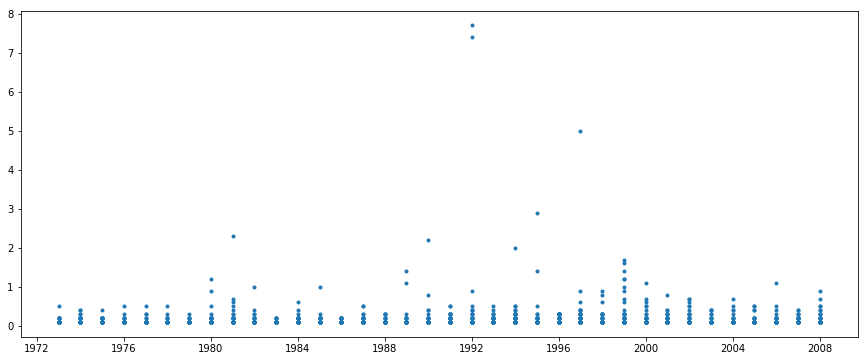

In [196]:
plt.figure(figsize=(15,6))
plt.plot(data_notnull["Year"], data_notnull["Amount"], '.')

In [14]:
data_notnull.dtypes
data_notnull["Donor"].unique()

array(['Japan', 'Germany', 'United States', 'United Kingdom', 'Canada',
       'Australia', 'Italy', 'Belgium', 'Sweden', 'France', 'Netherlands',
       'Norway', 'Switzerland', 'Kuwait', 'United Arab Emirates',
       'Denmark', 'Saudi Arabia', 'Austria', 'Spain', 'Finland', 'Korea'],
      dtype=object)

# average amounts by country over all years

In [13]:
#data_coords2[data_notn["lat_recip"].isna()]
data_agg = pd.DataFrame(data_notnull.groupby(["Donor", "Recipient"])["Amount"].mean())

In [14]:
data_agg = data_agg.reset_index()

In [202]:
#data_agg

In [15]:
data1 = pd.merge(data_agg, coords, left_on="Donor", right_on = "name_long", how="left")
data1 = data1.rename(columns = {"Longitude" : "lon_donor", "Latitude": "lat_donor"})

In [16]:
data2 = pd.merge(data1, coords, left_on="Recipient", right_on = "name_long", how="left")
data2 = data2.rename(columns = {"Longitude" : "lon_recip", "Latitude": "lat_recip"})

In [17]:
data2 = data2.drop(["name_long_x", "name_long_y"], axis=1)

count    96.000000
mean      0.215208
std       0.419777
min       0.100000
25%       0.100000
50%       0.123611
75%       0.181618
max       3.850000
Name: Amount, dtype: float64

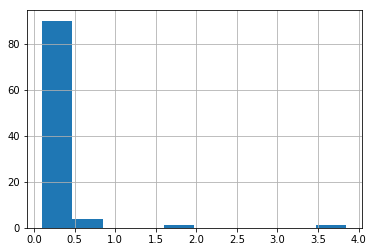

In [18]:
data2["Amount"].hist()
data2.Amount.describe()
#data2[data2["Amount"] > 1]

In [19]:
#data2[data2["lat_recip"].isna()]
data2.head()
len(data2)

96

In [244]:
#data2.groupby("Donor").agg({"Amount":"mean"})
#data2.groupby("Recipient").agg({"Amount":"mean"})

In [23]:
data2["Amount"] = round(data2["Amount"],2)

In [24]:
data2.to_json("aiddata.json", orient="records")